# Proyecto Final UD2
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo)

En este proyecto, los alumnos del módulo de Machine Learning deberán demostrar los conocimientos adquiridos durante la UD2 y aplicar al menos dos algoritmos diferentes de aprendizaje supervisado vistos en clase (KNN, Regresión Lineal, Regresión Logística, Árboles de Decisión, SVM).

Para ello, tomaremos como referencia el dataset credit_train.csv y credit_test.csv que contienen la información sobre una campaña de márketing llevada a cabo mediante llamadas teléfonicas para captar clientes que quieran acceder a un crédito.

**Features o Input variables:**

1 - **age**: edad numérica
2 - **job** : tipo de trabajo (puede tomar los valores: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - **marital** : estado civil (puede tomar los valores: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - **education** : nivel de estudios (puede tomar los valores: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - **default**: ya tiene un crédito solicitado por defecto? (puede tomar los valores: 'no','yes','unknown')
6 - **housing**: tiene hipoteca? (puede tomar los valores: 'no','yes','unknown')
7 - **loan**: tiene una cuenta personal? (puede tomar los valores: 'no','yes','unknown')
8 - **contact**: tipo de comunicación de contacto (puede tomar los valores: 'cellular','telephone')
9 - **month**: último mes de contacto (puede tomar los valores: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - **day_of_week**: último día de la semana en el que se le ha contactado (puede tomar los valores: 'mon','tue','wed','thu','fri')
11 - **duration**: duración del último contacto en segundos (numérico). Importante: este atributo afecta en gran medida a la salida ya que si duration es 0, entonces  la salida es 'no')
12 - **campaign**: número de veces que se le ha contactado durante la campaña a este cliente (numérico, incluye el último contacto)
13 - **pdays**: número de días que han pasado desde que el cliente fue contactado por última vez(numérico; 999 significa que no ha sido contactado anteriormente)
14 - **previous**: número de contactos anteriores a esta campaña a este cliente(numérico)
16 - **emp.var.rate**: tasa de variación del empleo - indicador trimestral (numérico)
17 - **cons.price.idx**: IPC - indicador mensual (numérico). Tiene como objetivo medir la evolución del nivel de precios de los bienes y servicios de consumo adquiridos por los hogares residentes en España.
18 - **cons.conf.idx**: índice de confianza de los consumidores - indicador mensual (numérico)
19 - **euribor3m**: euribor tasa 3 meses - indicador diario (numérico). porcentaje que paga como tasa un banco cuando otro le presta dinero.
20 - **nr.employed**: número de trabajadores - indicador en porciones  (numérico)

**Output variable (desired target):**
21 - **y** - Suscripción al crédito por parte del cliente? (binary: 'yes','no')

Los requisitos mínimos de este proyecto consisten en:

* Etapas comunes 1, 2 y 3 de importación, análisis numérico y visual, así como preprocesado.
* Para cada algoritmo que apliques deberás de mantener la siguiente estructura de 5 etapas (del 4-8), pero puedes añadir subapartados o etapas adicionales.
* En cada etapa se deben añadir explicaciones justificativas de lo que se quiere hacer, así como de los resultados obtenidos.
* Como resultado final, se deben contrastar los resultados obtenidos y comparar los algoritmos utilizados indicando claramente cual y porqué obtiene mejor resultados.

Cualificaciones:
- Uso de 2 algoritmos: cualificación máxima de 7 puntos
- Uso de 3 algoritmos: cualificación máxima de 9 puntos.
- Almacenaje de los datasets en AWS S3 y uso de 3 algoritmos: cualificación máxima de 10 puntos.

Uso de GIT para 



Este notebook consistirá en el análisis de los dos dataset proporcionados (credit-train.csv y credit-test.csv), para ello primero realizaremos el análisis de estos datos para tener una idea de que tratan e intentar obtener información para saber que algoritmos aplicar. Realizaremos un prepocesado para preparar los datos para los algoritmos supervisados que hemos aprendido, finalmente aplicaremos algunos de esos algoritmos que consideremos adecuados y analizaremos el resultado para determinar que algoritmo nos dio el mejor resultado.

## 1. Importación de paquetes y dataset

In [12]:
import pandas as pd #Librería para el manejo y análisis de estructuras de datos

df_credit_train = pd.read_csv("data/credit-train.csv")
df_credit_test = pd.read_csv("data/credit-test.csv")

In [13]:
df_credit_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [14]:
df_credit_test.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,175,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8


## 2.EDA y Visual EDA

#### Vemos cuantas tuplas, columnas, non-null y tipo de datos tenemos

In [15]:
df_credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [16]:
df_credit_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp_var_rate    4119 non-null   float64
 16  cons_price_idx  4119 non-null   float64
 17  cons_conf_idx   4119 non-null   f

#### obtenemos varios datos estadisticos
Como ambos dataset son iguales solo con la diferencia de que credit-train.csv tiene una columna que indica si el cliente quiere acceder al credito, para el EDA emplearemos solo el dataset credit-train.csv.

In [17]:
df_credit_train.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


#### Columnas que pueden tomar diferentes valores

In [18]:
df_credit_train.groupby("job").agg({"age":"mean"})

,age
job,
admin.,38.187296
blue-collar,39.555760
entrepreneur,41.723214
housemaid,45.500000
management,42.362859
retired,62.027326
self-employed,39.949331
services,37.926430
student,25.894857


In [19]:
df_credit_train.groupby("marital").agg({"age":"mean"})

,age
marital,
divorced,44.899393
married,42.307165
single,33.158714
unknown,40.275000


In [20]:
df_credit_train.groupby("education").agg({"age":"mean"})

,age
education,
basic.4y,47.596504
basic.6y,40.448953
basic.9y,39.061208
high.school,37.998213
illiterate,48.500000
professional.course,40.080107
university.degree,38.879191
unknown,43.481225


In [21]:
df_credit_train.groupby("age").agg({"default":"count", "housing":"count", "loan":"count"})

,default,housing,loan
age,,,
17,5,5,5
18,28,28,28
19,42,42,42
20,65,65,65
21,102,102,102
...,...,...,...
91,2,2,2
92,4,4,4
94,1,1,1


#### Graficos
Realizaremos algunas gráficas comparando varias variables de los datos.

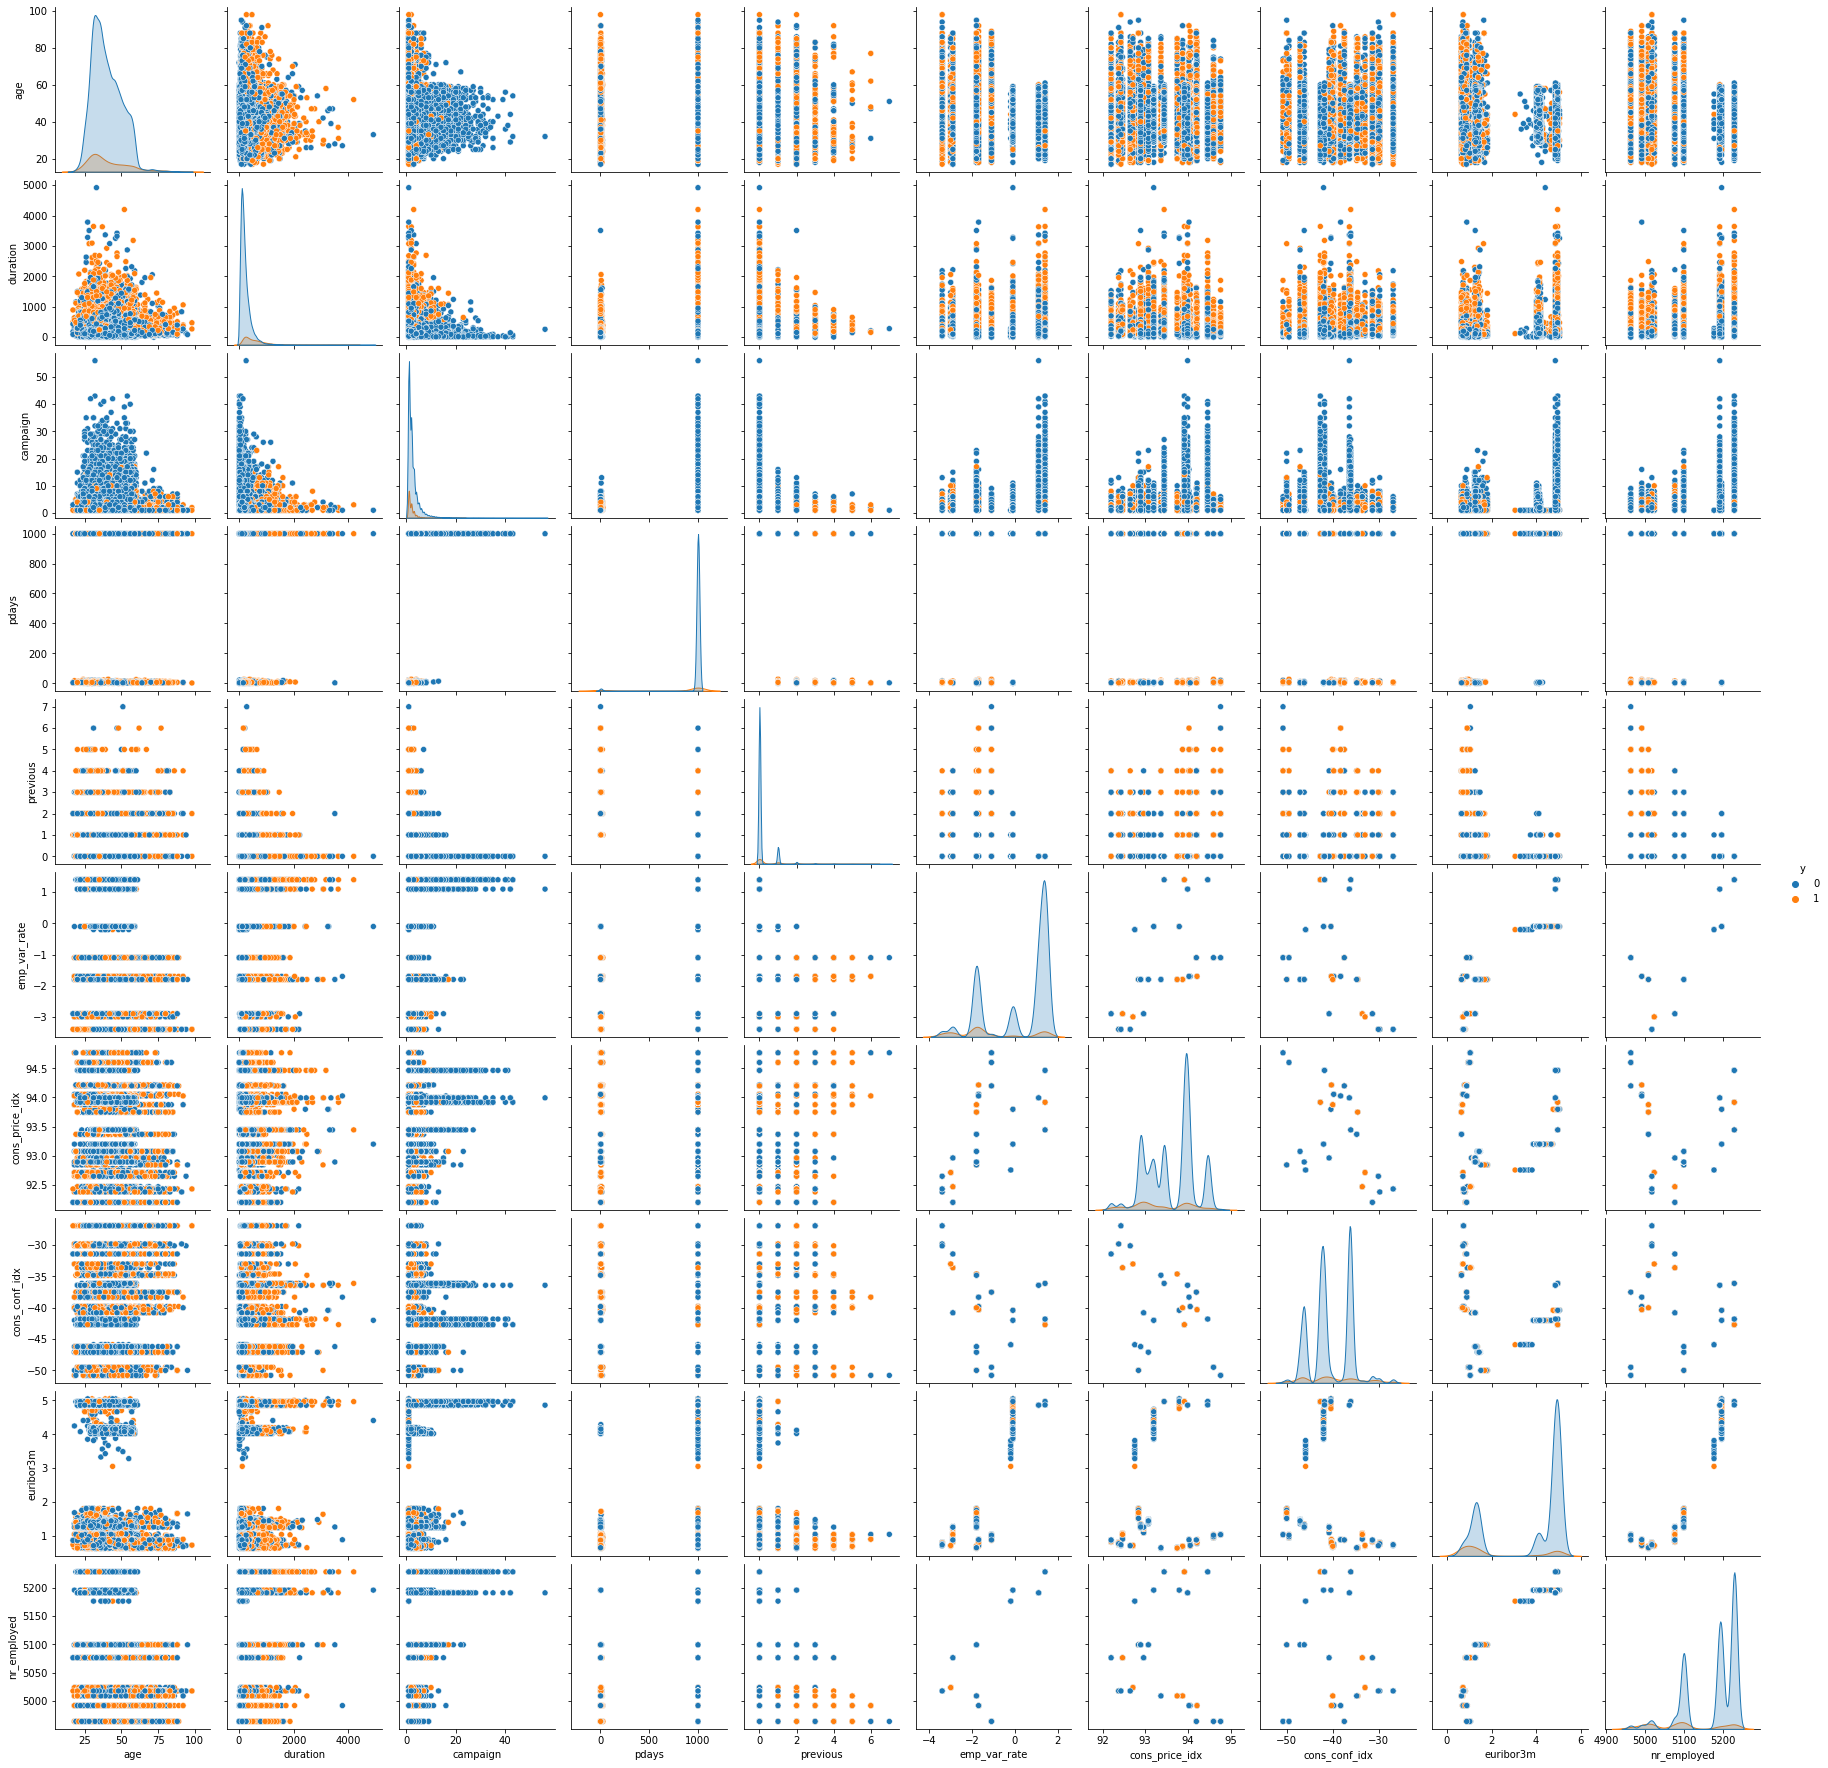

In [22]:
import seaborn as sns #Librería para generar gráficos
sns.pairplot(df_credit_train, hue="y")
#Empleamos pairplot para poder ver la relación entre las variables del DataFrame. Con hue establecemos una tercera dimension
#Para la variable categorica 'Y', 0 es si y 1 es no

<AxesSubplot:>

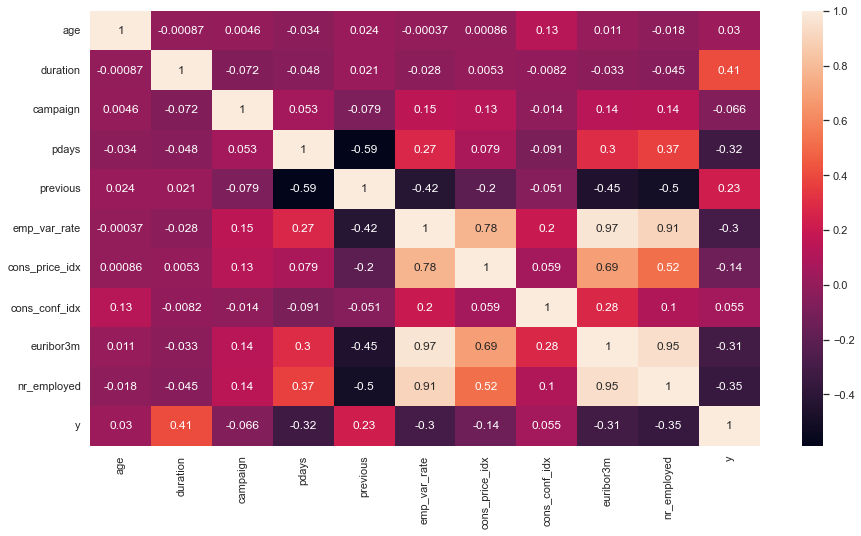

In [23]:
sns.set(rc={'figure.figsize':(15,8)}) #Permite establer el tamaño del mapa de calor
sns.heatmap(df_credit_train.corr(),annot=True) #Mapa de calor, annot indica que si se muestra los valores numericos
# Empleamos un mapa de calor, similar a pairplot, para ver la relación entre las variables.

<AxesSubplot:>

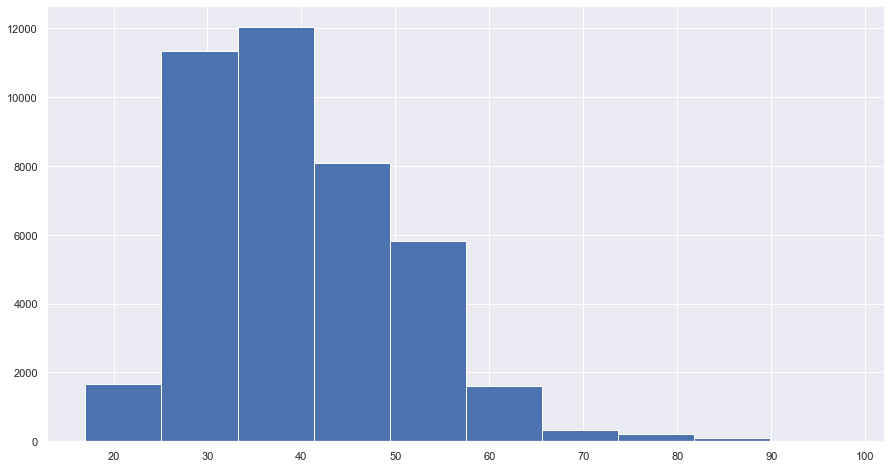

In [24]:
df_credit_train["age"].hist()

<AxesSubplot:>

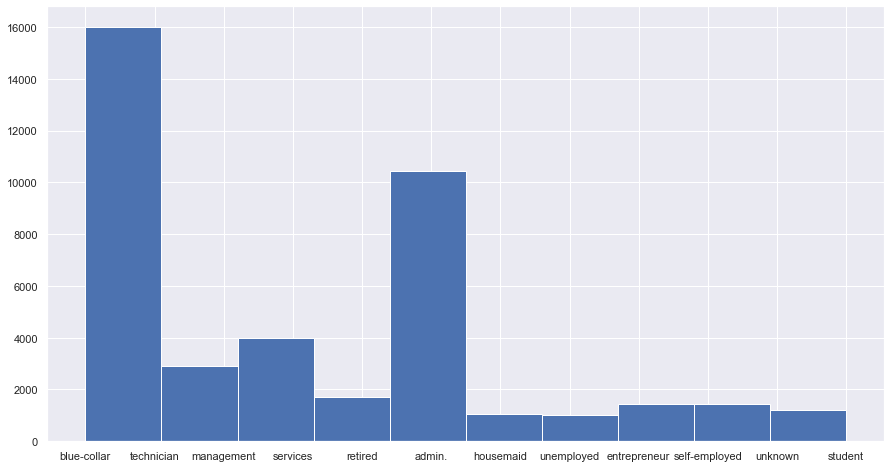

In [25]:
df_credit_train["job"].hist()

Text(0, 0.5, 'Edad media')

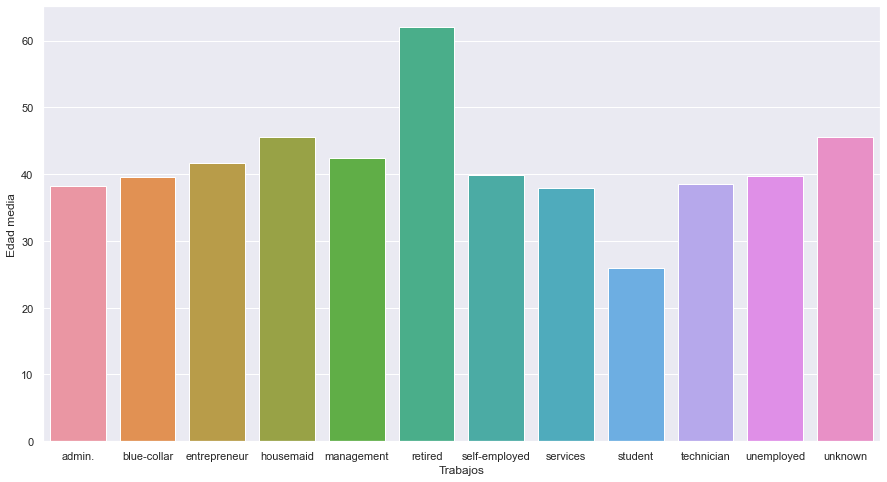

In [26]:
# Obtenemos una grafica para ver la edad media dependiendo del trabajo.

df_aux = df_credit_train.groupby("job").agg({"age":"mean"}) #Obtenemos la edad media por trabajo
ax = sns.barplot(x=df_aux.index, y=df_aux["age"])
ax.set_xlabel("Trabajos")
ax.set_ylabel("Edad media")

Text(0, 0.5, 'Cantidad Suscripciones al credito')

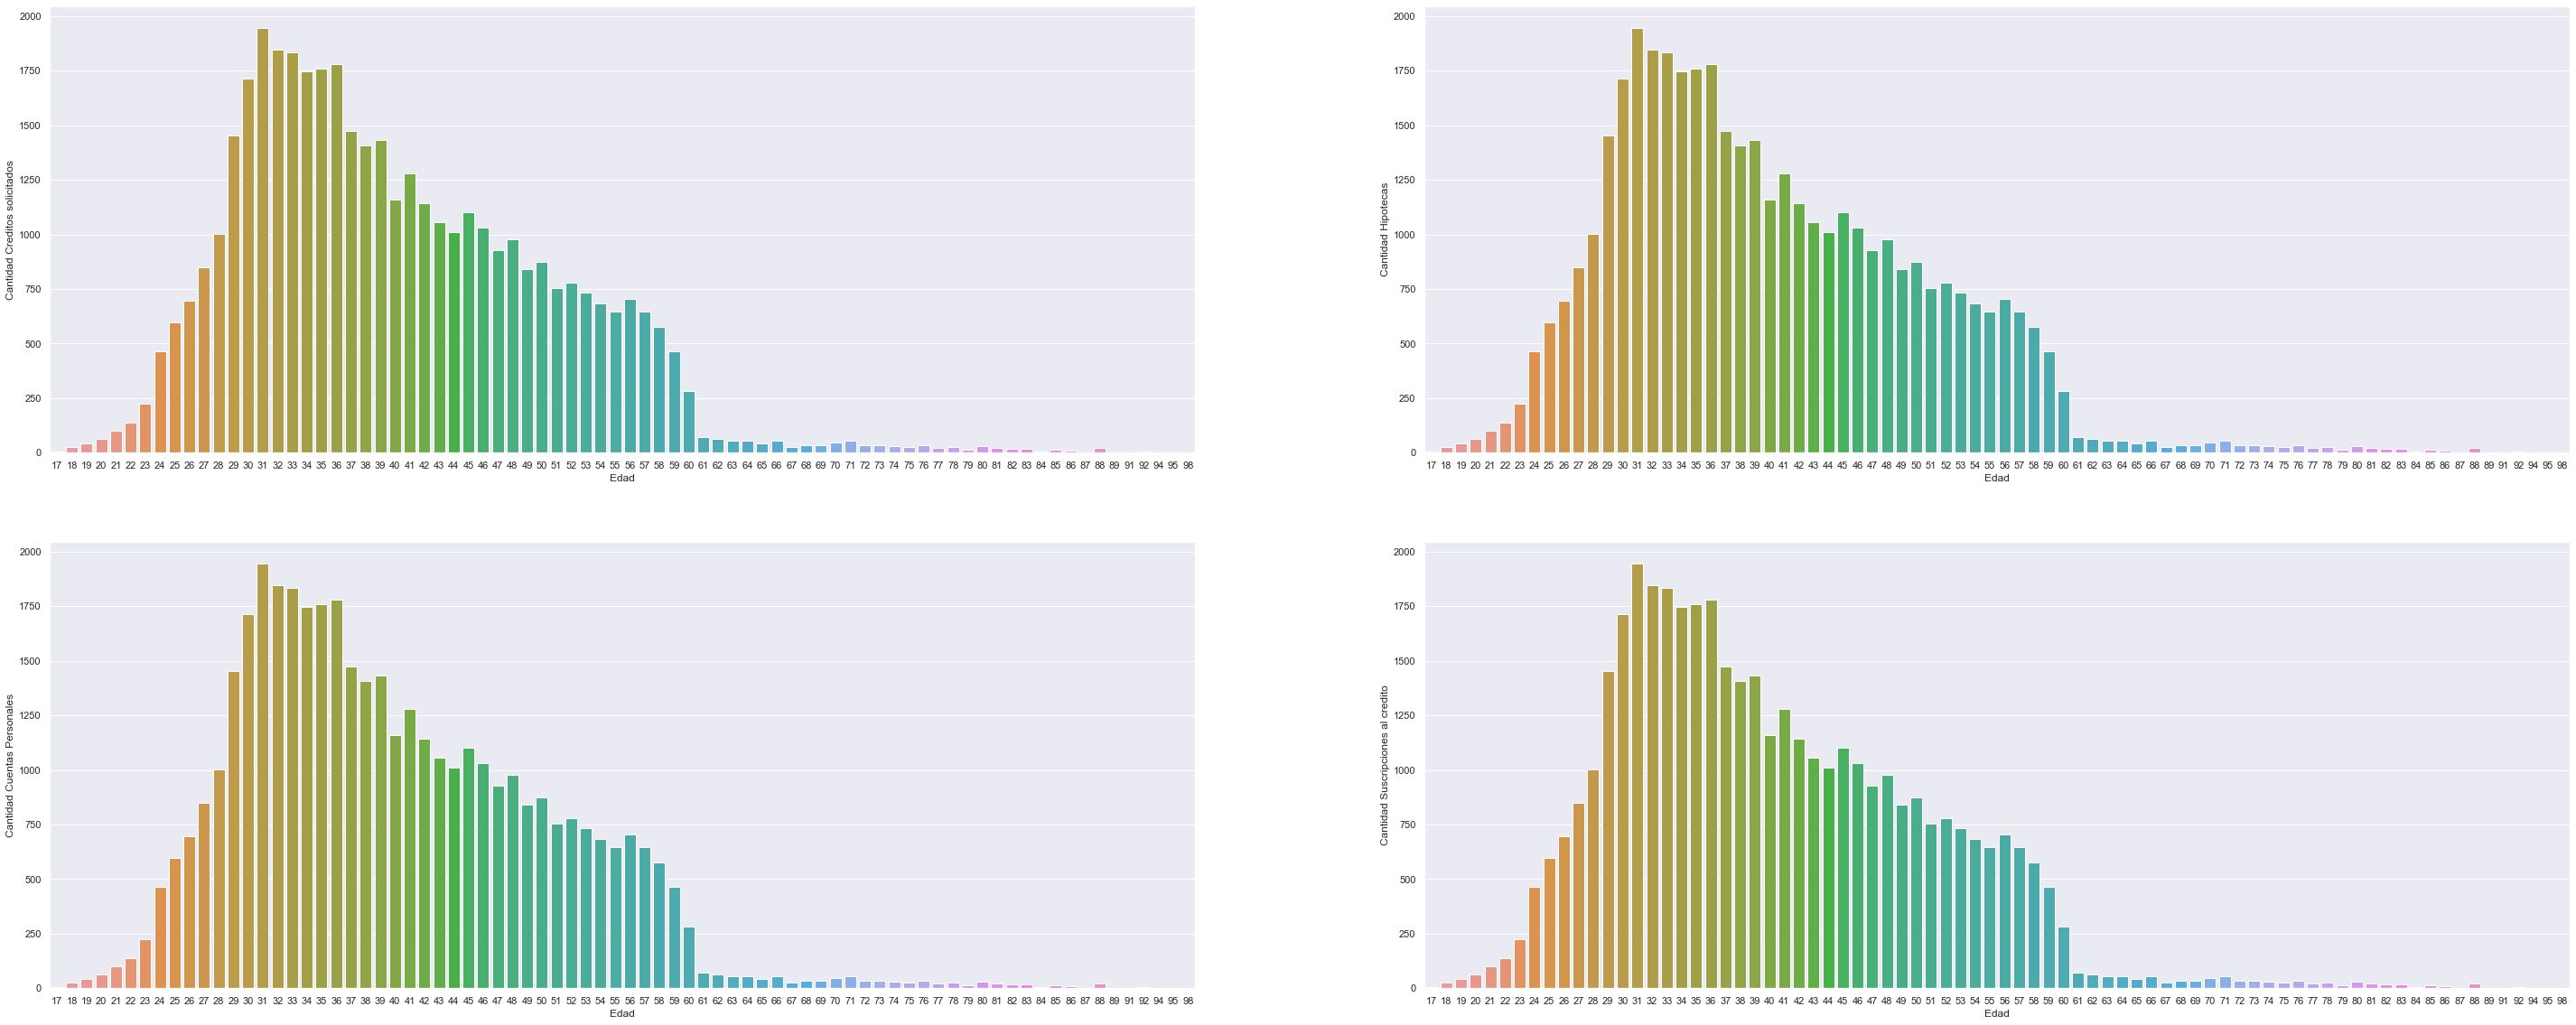

In [27]:
import matplotlib.pyplot as plt
df_aux = df_credit_train.groupby("age").agg({"default":"count", "housing":"count", "loan":"count", "y":"count"})

figura, axis = plt.subplots(2,2, figsize=(50,20)) #Establecemos una figura dividida en cuetro

sns.set(rc = {'figure.figsize':(35,15)}) # Establecemos el tamaño de cada una de las graficas
sns.barplot(ax=axis[0,0], x=df_aux.index, y=df_aux["default"])
axis[0,0].set_xlabel("Edad")
axis[0,0].set_ylabel("Cantidad Creditos solicitados")

sns.barplot(ax=axis[0,1], x=df_aux.index, y=df_aux["housing"])
axis[0,1].set_xlabel("Edad")
axis[0,1].set_ylabel("Cantidad Hipotecas")

sns.barplot(ax=axis[1,0], x=df_aux.index, y=df_aux["loan"])
axis[1,0].set_xlabel("Edad")
axis[1,0].set_ylabel("Cantidad Cuentas Personales")

sns.barplot(ax=axis[1,1], x=df_aux.index, y=df_aux["y"])
axis[1,1].set_xlabel("Edad")
axis[1,1].set_ylabel("Cantidad Suscripciones al credito")

# Conjunto de cuatro graficas donde se observa la relacion de la edad con: credito solicitado, hipoteca, cuenta personal, si se suscribe al credito

Text(0, 0.5, 'Veces contactado durante la campaña (Media)')

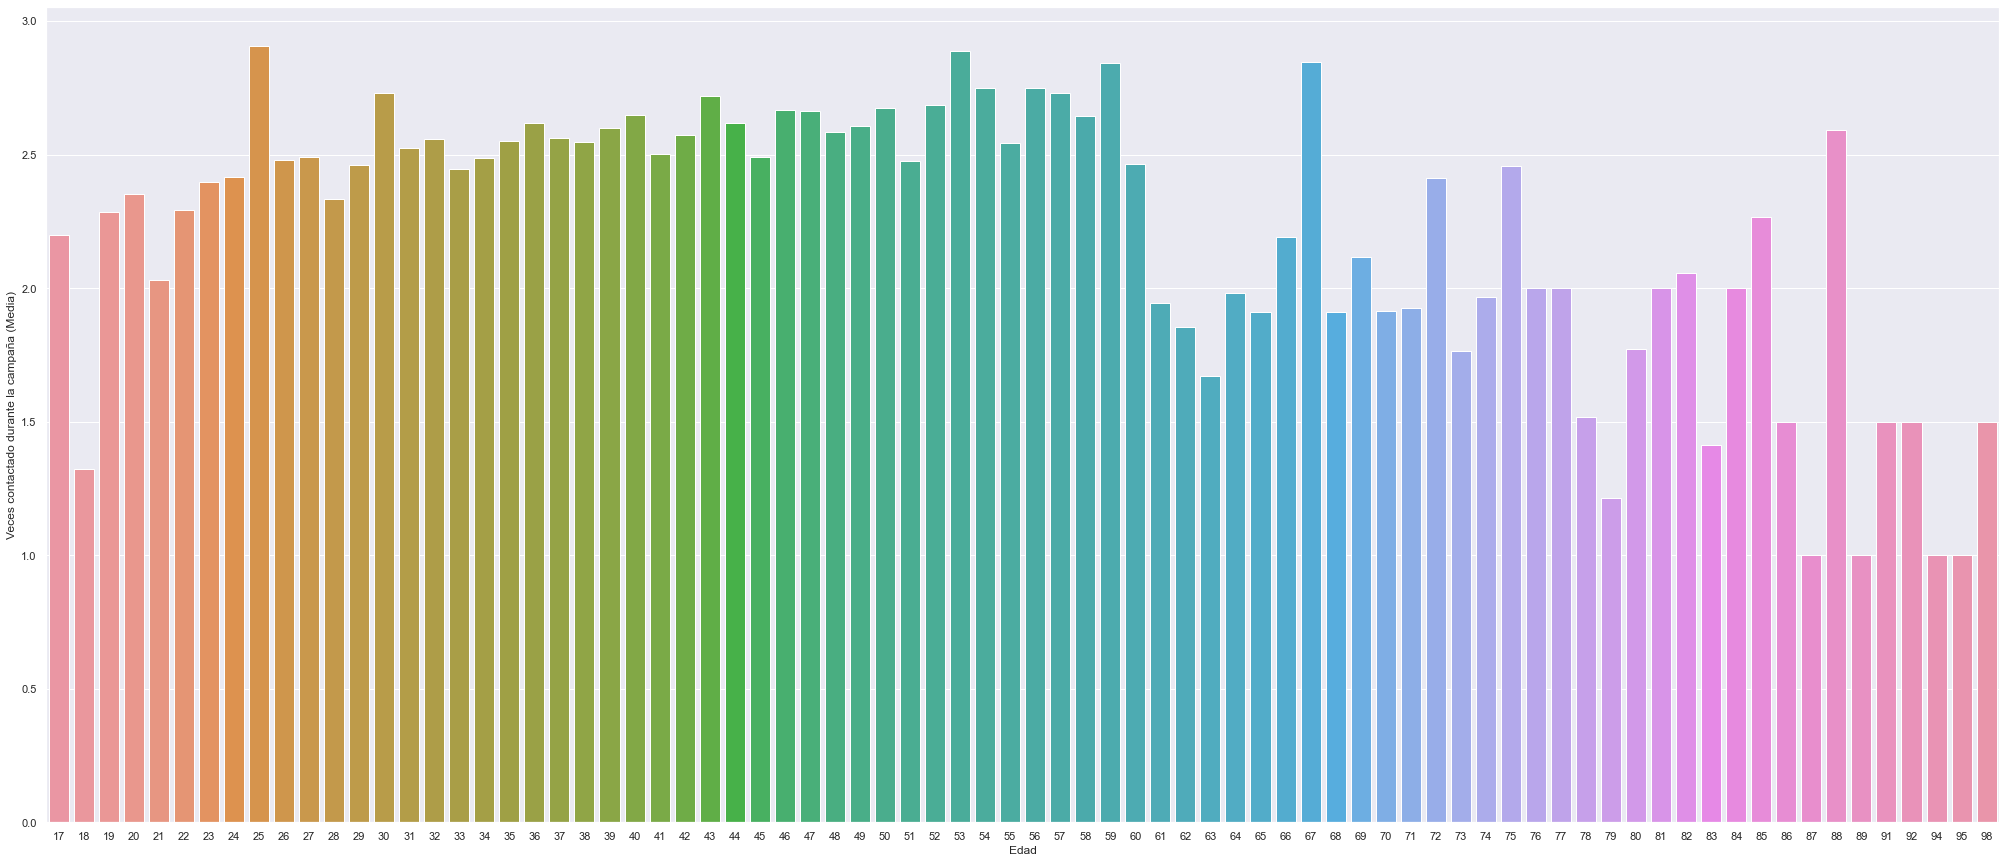

In [28]:
#Grafica donde vemos la relación entre la edad y las veces que fue contactado durante la campaña

df_credito_aux = df_credit_train.groupby("age").agg({"campaign":"mean"})
ax = sns.barplot(x=df_credito_aux.index, y=df_credito_aux["campaign"])
sns.set(rc = {'figure.figsize':(20,8)})
ax.set_xlabel("Edad")
ax.set_ylabel("Veces contactado durante la campaña (Media)")

Text(0, 0.5, 'Cantidad Suscripciones al credito')

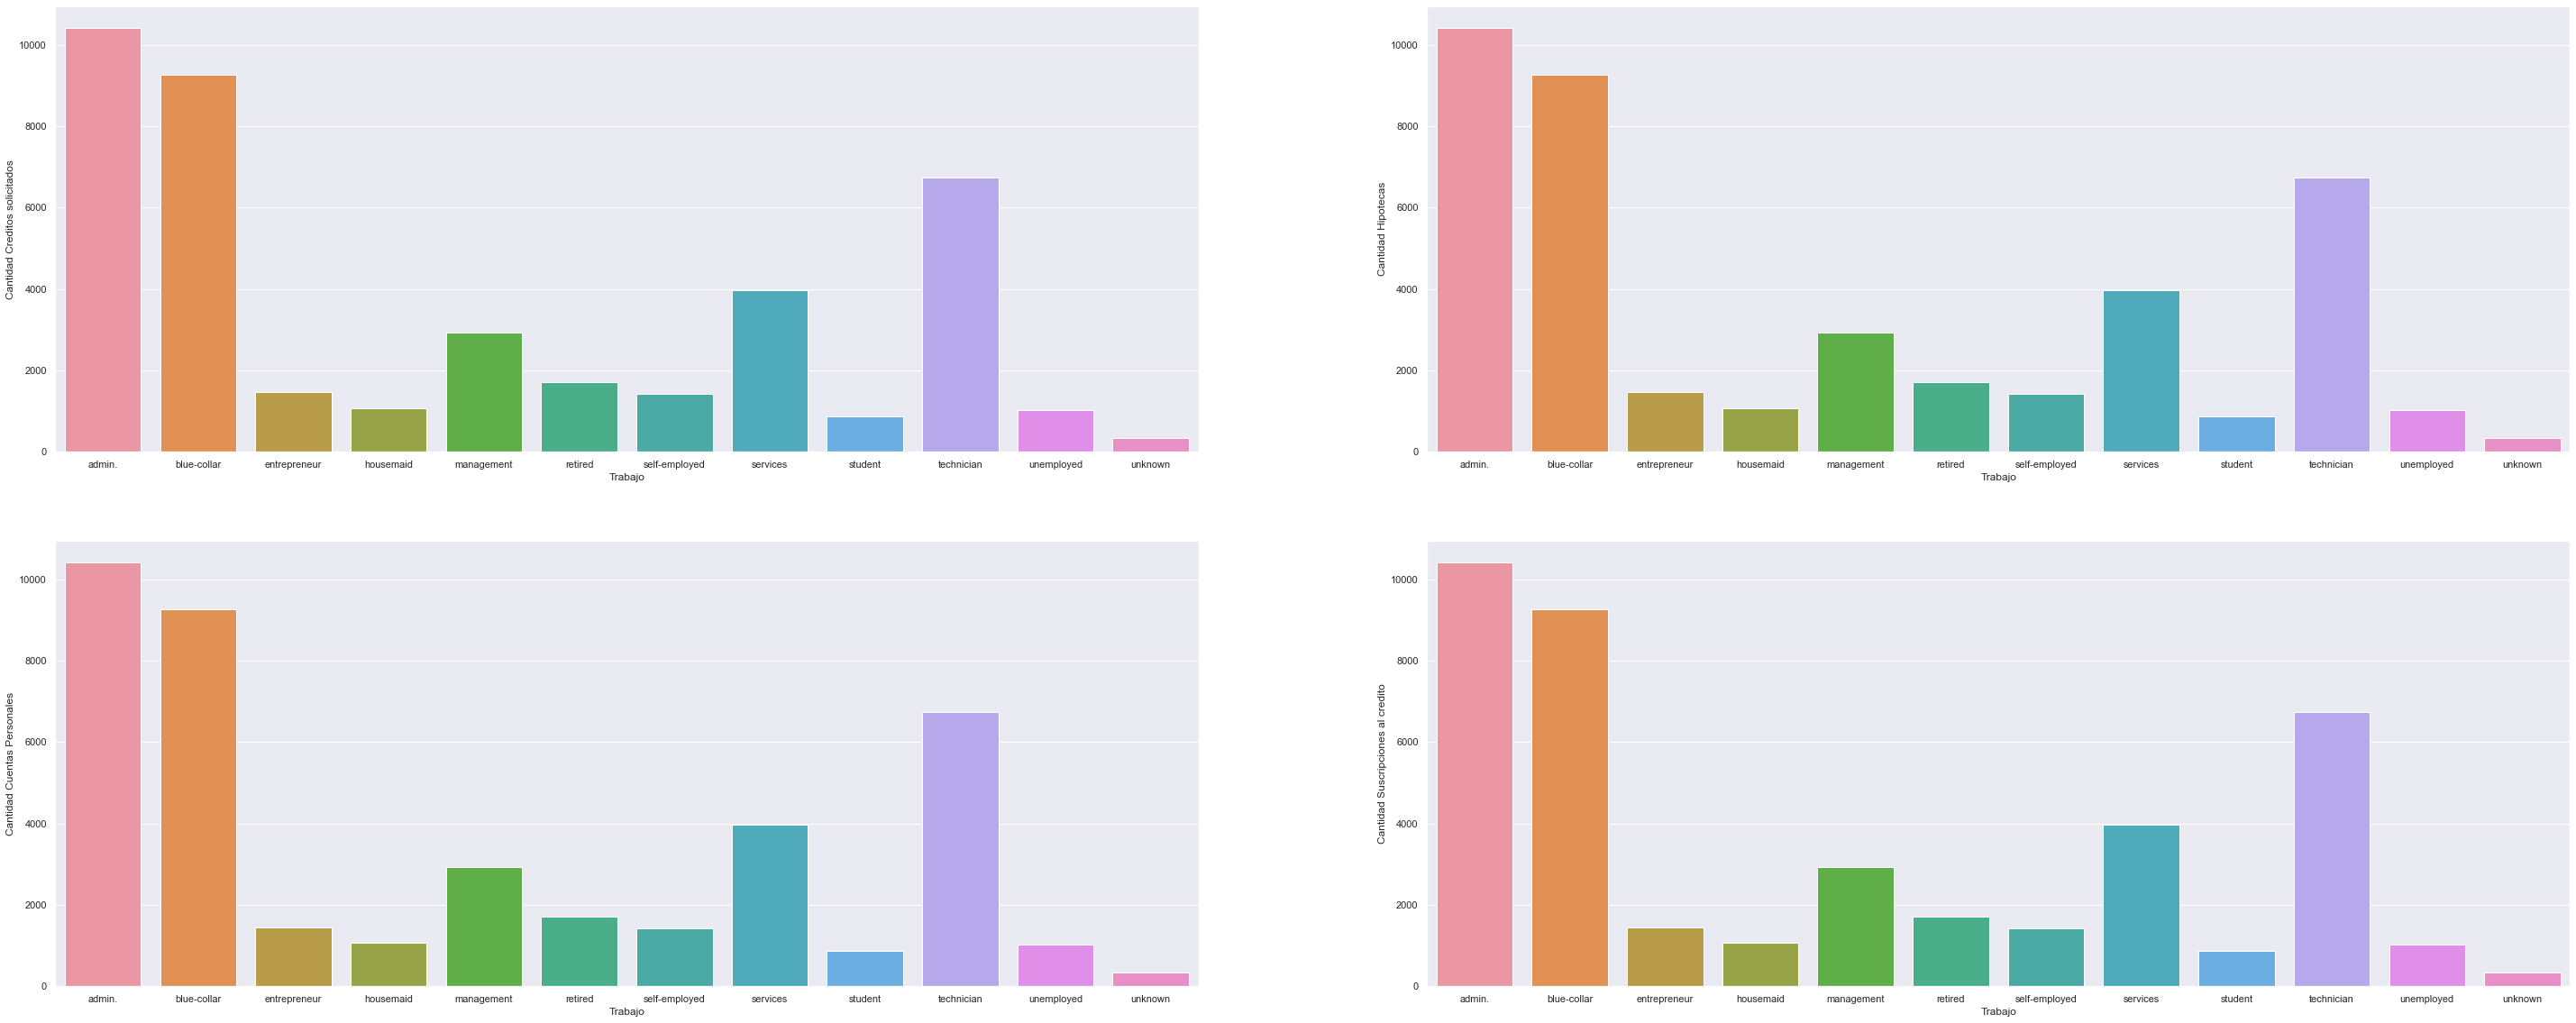

In [29]:
df_aux = df_credit_train.groupby("job").agg({"default":"count", "housing":"count", "loan":"count", "y":"count"})

figura, axis = plt.subplots(2,2, figsize=(50,20)) #Establecemos una figura dividida en cuetro

sns.set(rc = {'figure.figsize':(35,15)}) # Establecemos el tamaño de cada una de las graficas
sns.barplot(ax=axis[0,0], x=df_aux.index, y=df_aux["default"])
axis[0,0].set_xlabel("Trabajo")
axis[0,0].set_ylabel("Cantidad Creditos solicitados")

sns.barplot(ax=axis[0,1], x=df_aux.index, y=df_aux["housing"])
axis[0,1].set_xlabel("Trabajo")
axis[0,1].set_ylabel("Cantidad Hipotecas")

sns.barplot(ax=axis[1,0], x=df_aux.index, y=df_aux["loan"])
axis[1,0].set_xlabel("Trabajo")
axis[1,0].set_ylabel("Cantidad Cuentas Personales")

sns.barplot(ax=axis[1,1], x=df_aux.index, y=df_aux["y"])
axis[1,1].set_xlabel("Trabajo")
axis[1,1].set_ylabel("Cantidad Suscripciones al credito")

# Conjunto de cuatro graficas donde se observa la relacion del tipo de trabajo con: credito solicitado, hipoteca, cuenta personal, si se suscribe al credito

Text(0, 0.5, 'Veces contactado durante la campaña (Media)')

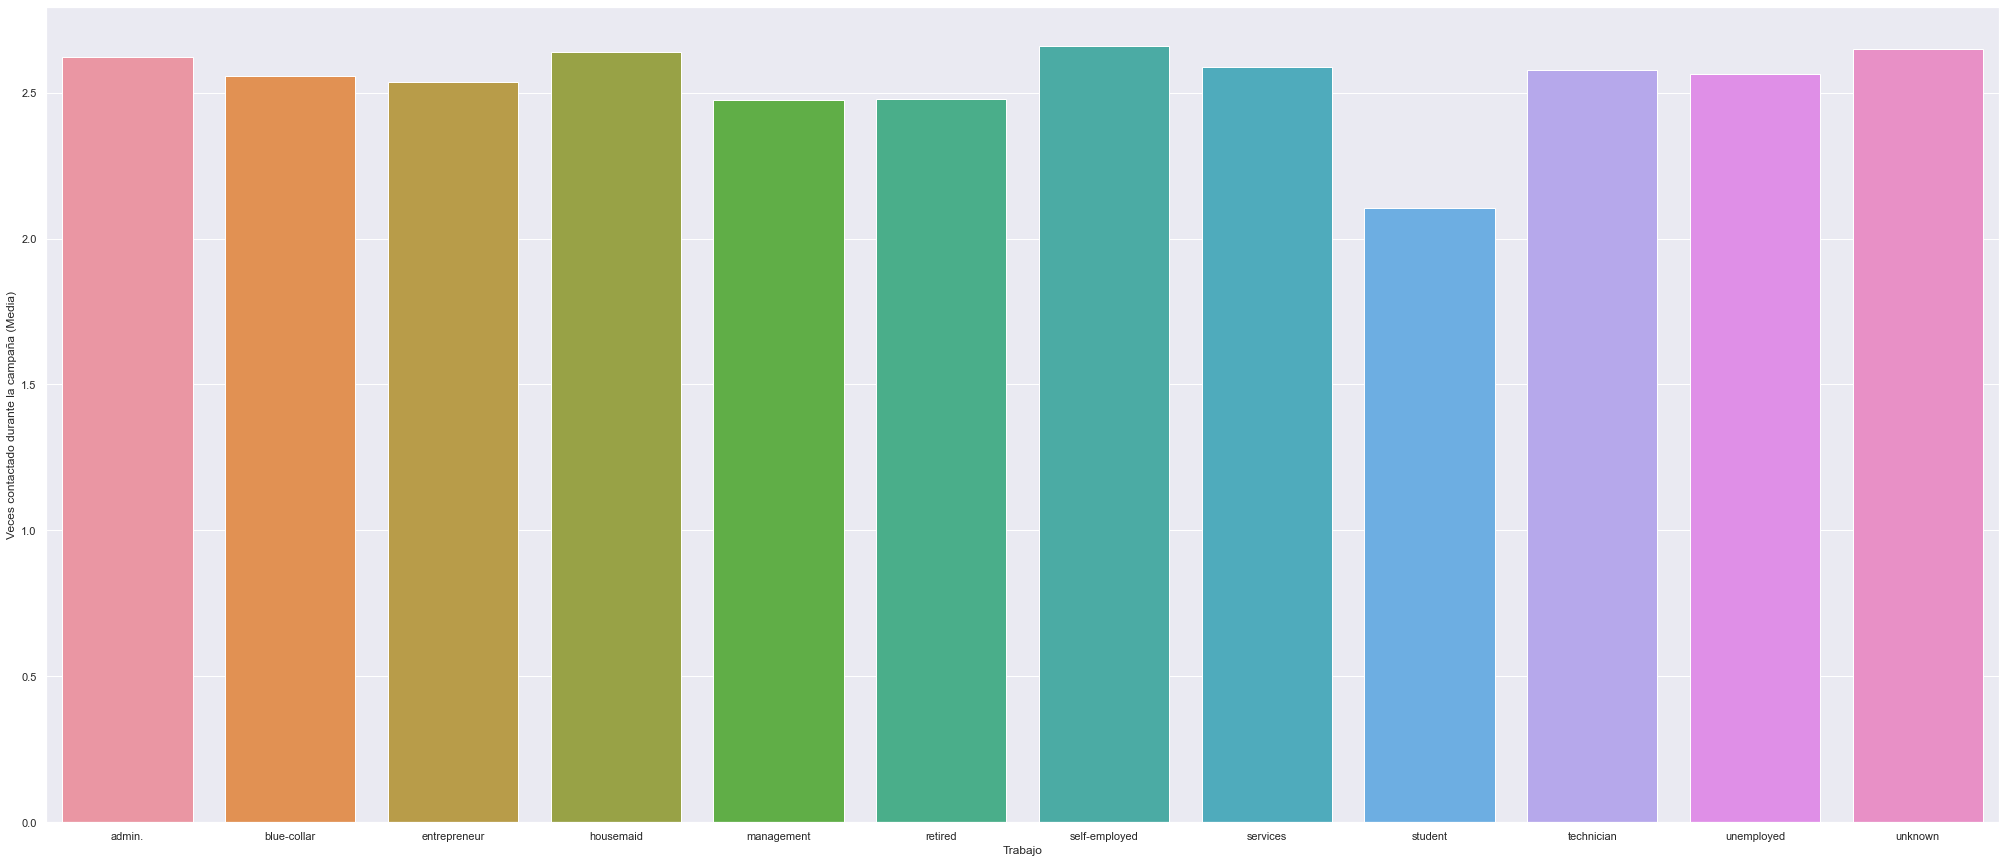

In [30]:
# Grafica de veces contactado durante la campaña respecto el tipo de trabajo

df_credito_aux = df_credit_train.groupby("job").agg({"campaign":"mean"}) #Obtenemos la cantidad de creditos solicitados por edad
ax = sns.barplot(x=df_credito_aux.index, y=df_credito_aux["campaign"])
sns.set(rc = {'figure.figsize':(20,8)})
ax.set_xlabel("Trabajo")
ax.set_ylabel("Veces contactado durante la campaña (Media)")

<AxesSubplot:xlabel='job', ylabel='age'>

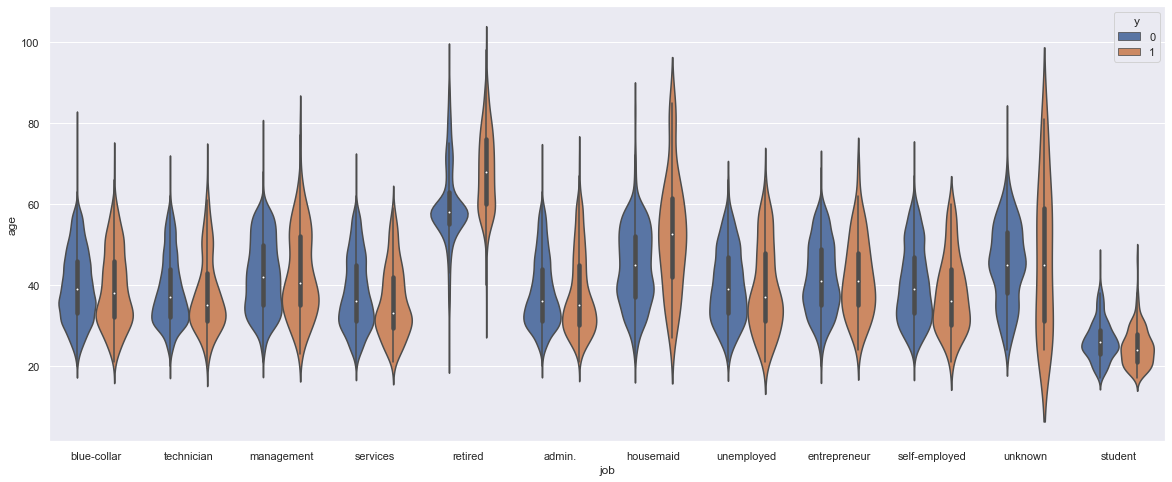

In [31]:
# Grafica que nos proporciona la distribución de la edad respecto a cada tipo de trabajo, empleamos una tercera variable que seria la y

df_credit_train.count()
sns.violinplot(x=df_credit_train["job"], y=df_credit_train["age"], hue=df_credit_train["y"])

## 3. Preprocessing data


In [32]:
# Eliminamos datos duplicados
df_credit_train_duplicados = df_credit_train.drop_duplicates()
df_credit_test_duplicados = df_credit_test.drop_duplicates()
print("Dimensiones train: ", df_credit_train.shape)
print("Dimensiones train sin duplicados: ", df_credit_train_duplicados.shape)
print("Dimensiones test: ", df_credit_test.shape)
print("Dimensiones test sin duplicados: ", df_credit_test_duplicados.shape)

Dimensiones train:  (41188, 21)
Dimensiones train sin duplicados:  (41176, 21)
Dimensiones test:  (4119, 20)
Dimensiones test sin duplicados:  (4119, 20)


In [33]:
# Comenzamos el preprocesado sustituyendo los valores de las variables con valores "yes" o "no", por valores numericos, 1 y 0. Para ello empleamos LabelEncoder

from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()
df_credit_train_encoder = df_credit_train_duplicados.copy()
df_credit_test_encoder = df_credit_test_duplicados.copy()

df_credit_train_encoder["default"] = class_label_encoder.fit_transform(df_credit_train_encoder["default"].values)
df_credit_train_encoder["housing"] = class_label_encoder.fit_transform(df_credit_train_encoder["housing"].values)
df_credit_train_encoder["loan"] = class_label_encoder.fit_transform(df_credit_train_encoder["loan"].values)

df_credit_test_encoder["default"] = class_label_encoder.fit_transform(df_credit_test_encoder["default"].values)
df_credit_test_encoder["housing"] = class_label_encoder.fit_transform(df_credit_test_encoder["housing"].values)
df_credit_test_encoder["loan"] = class_label_encoder.fit_transform(df_credit_test_encoder["loan"].values)

In [34]:
# Continuamos sustituyendo los valores de las variables que pueden ser varios valores ('divorced','married','single','unknown'), por una columna numerica para cada valor. Empleamos get_dummies

df_credit_train_dummies = pd.get_dummies(df_credit_train_encoder)
df_credit_test_dummies = pd.get_dummies(df_credit_test_encoder)

In [35]:
# Situamos la columna 'y', que seria la salida, al final del dataframe para facilitar la separación de los datos

variable_y_aux = df_credit_train_dummies["y"]
df_credit_train_dummies = df_credit_train_dummies.drop(columns=["y"])
df_credit_train_dummies["y"] = variable_y_aux
df_credit_train_dummies

,age,default,housing,loan,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,44,1,2,0,210,1,999,0,1.4,93.444,...,0,0,0,1,0,0,0,1,0,0
1,53,0,0,0,138,1,999,0,-0.1,93.200,...,0,1,0,0,0,0,0,1,0,0
2,28,0,2,0,339,3,6,2,-1.7,94.055,...,0,0,0,1,0,0,0,0,1,1
3,39,0,0,0,185,2,999,0,-1.8,93.075,...,0,1,0,0,0,0,0,1,0,0
4,55,0,2,0,137,1,3,1,-2.9,92.201,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,1,0,2,222,1,999,0,1.4,94.465,...,0,0,0,1,0,0,0,1,0,0
41184,31,1,0,0,196,2,999,0,1.1,93.994,...,0,0,0,1,0,0,0,1,0,0
41185,42,1,2,2,62,3,999,0,1.1,93.994,...,0,0,0,0,0,1,0,1,0,0
41186,48,0,0,2,200,2,999,0,-3.4,92.431,...,0,0,0,0,1,0,0,1,0,0


In [36]:
df_credit_test_dummies

,age,default,housing,loan,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,0,2,0,487,2,999,0,-1.8,92.893,...,0,0,1,0,0,0,0,0,1,0
1,39,0,0,0,346,4,999,0,1.1,93.994,...,0,0,1,0,0,0,0,0,1,0
2,25,0,2,0,227,1,999,0,1.4,94.465,...,0,0,0,0,0,0,1,0,1,0
3,38,0,1,1,17,3,999,0,1.4,94.465,...,0,0,1,0,0,0,0,0,1,0
4,47,0,2,0,58,1,999,0,-0.1,93.200,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,2,2,53,1,999,0,1.4,93.918,...,0,0,0,0,1,0,0,0,1,0
4115,39,0,2,0,219,1,999,0,1.4,93.918,...,0,0,1,0,0,0,0,0,1,0
4116,27,0,0,0,64,2,999,1,-1.8,92.893,...,0,0,0,1,0,0,0,1,0,0
4117,58,0,0,0,528,1,999,0,1.4,93.444,...,0,0,1,0,0,0,0,0,1,0


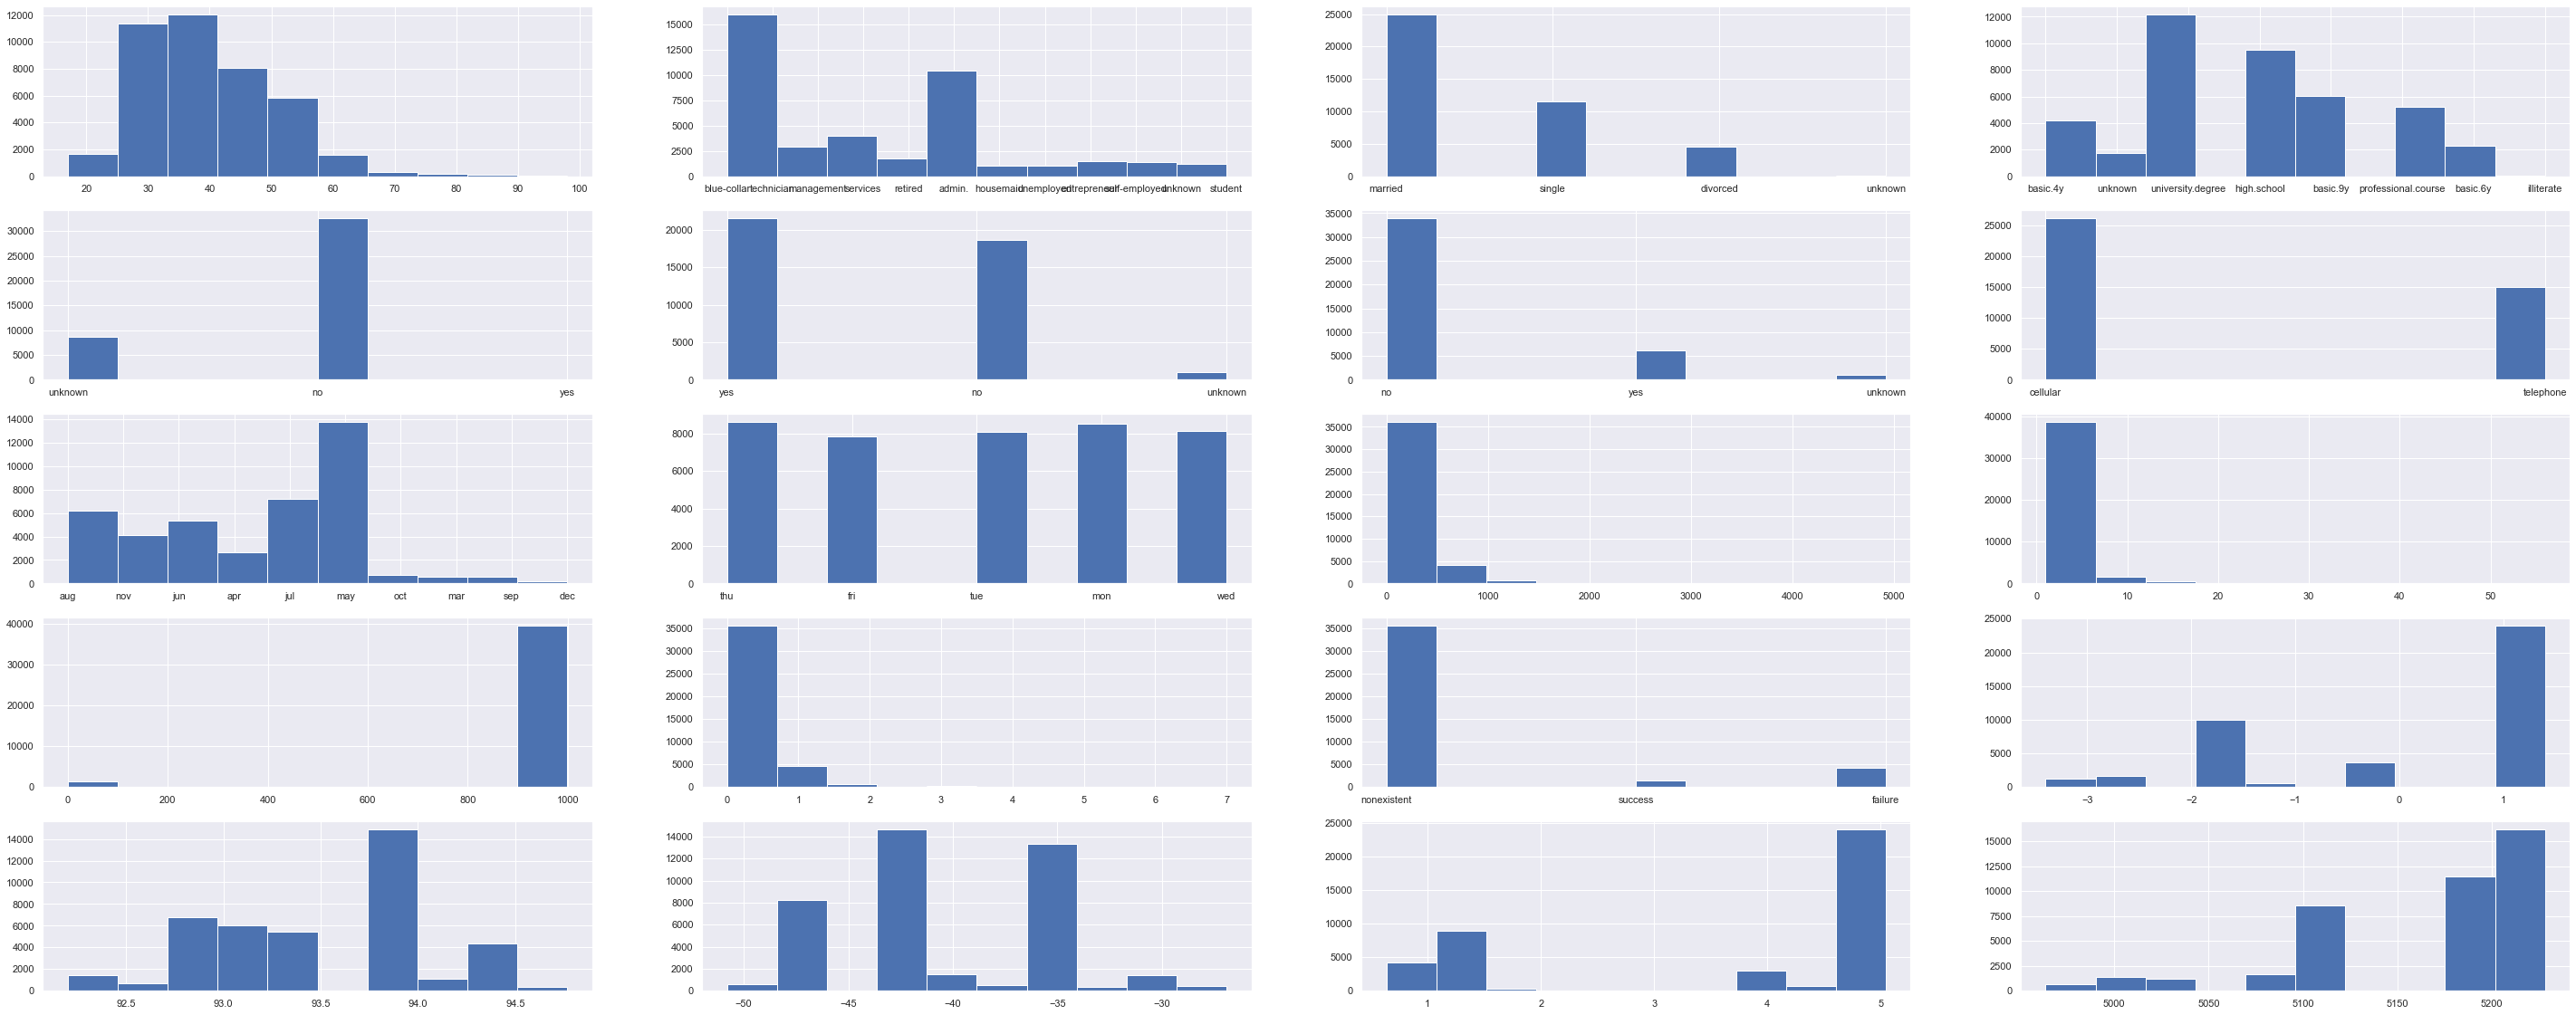

In [37]:
figura, axis = plt.subplots(5,4, figsize=(50,20)) #Establecemos una figura dividida en cuetro
columnas = df_credit_train.columns
aux = 0
for a in range(0,5):
    for b in range(0,4):
        df_credit_train[columnas[aux]].hist(ax=axis[a,b])
        aux += 1

In [38]:
# Realizamos una normalización a los datos, ya que la normalización es una buena técnica para usar cuando no conoce la distribución de sus datos o cuando sabe que la distribución no es gaussiana (una curva de campana).

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

df_credit_train_normal = df_credit_train_dummies.copy()
df_credit_train_normal = pd.DataFrame(mms.fit_transform(df_credit_train_normal))
df_credit_train_normal.columns = df_credit_train_dummies.columns
df_credit_train_normal

,age,default,housing,loan,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,0.333333,0.5,1.0,0.0,0.042700,0.000000,1.000000,0.000000,1.000000,0.484412,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.444444,0.0,0.0,0.0,0.028060,0.000000,1.000000,0.000000,0.687500,0.389322,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.135802,0.0,1.0,0.0,0.068930,0.036364,0.006006,0.285714,0.354167,0.722525,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.271605,0.0,0.0,0.0,0.037617,0.018182,1.000000,0.000000,0.333333,0.340608,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.469136,0.0,1.0,0.0,0.027857,0.000000,0.003003,0.142857,0.104167,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,0.518519,0.5,0.0,1.0,0.045140,0.000000,1.000000,0.000000,1.000000,0.882307,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
41172,0.172840,0.5,0.0,0.0,0.039854,0.018182,1.000000,0.000000,0.937500,0.698753,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
41173,0.308642,0.5,1.0,1.0,0.012607,0.036364,1.000000,0.000000,0.937500,0.698753,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
41174,0.382716,0.0,0.0,1.0,0.040667,0.018182,1.000000,0.000000,0.000000,0.089634,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [39]:
mms_2 = MinMaxScaler()
df_credit_test_normal = df_credit_test_dummies.copy()
df_credit_test_normal = pd.DataFrame(mms_2.fit_transform(df_credit_test_normal))
df_credit_test_normal.columns = df_credit_test_dummies.columns
df_credit_test_normal

,age,default,housing,loan,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.171429,0.0,1.0,0.0,0.133681,0.029412,1.0,0.000000,0.333333,0.269680,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.300000,0.0,0.0,0.0,0.094977,0.088235,1.0,0.000000,0.937500,0.698753,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.100000,0.0,1.0,0.0,0.062311,0.000000,1.0,0.000000,1.000000,0.882307,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.285714,0.0,0.5,0.5,0.004666,0.058824,1.0,0.000000,1.000000,0.882307,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.414286,0.0,1.0,0.0,0.015921,0.000000,1.0,0.000000,0.687500,0.389322,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0.171429,0.0,1.0,1.0,0.014548,0.000000,1.0,0.000000,1.000000,0.669135,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4115,0.300000,0.0,1.0,0.0,0.060115,0.000000,1.0,0.000000,1.000000,0.669135,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4116,0.128571,0.0,0.0,0.0,0.017568,0.029412,1.0,0.166667,0.333333,0.269680,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4117,0.571429,0.0,0.0,0.0,0.144935,0.000000,1.0,0.000000,1.000000,0.484412,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## división del dataset

In [40]:
# Dividimos el data set df_credit_train para tener datos de entrenamiento y de testeo
X = df_credit_train_normal.iloc[:,:df_credit_train_normal.shape[1]-1].values
y = df_credit_train_normal["y"].values

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [42]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (30882, 57)
Test set shape: (10294, 57)


# Algoritmo de regresión logística

Este algoritmo es perfecto para esta situación ya que nos permite realizar una clasificación binaria. En nuestros datos simplemente queremos saber 'SI se suscribe al credito' o 'NO se suscribe al credito'. Ya que nuestro resultado 'y' es una variable categórica, puede ser '0' o '1', 'Si' o 'No', es perfecta en este escenario.

### 4. Creación del modelo y división del dataset

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

clf1 = LogisticRegression(penalty='l2', solver='newton-cg') # Creamos el modelo

### 5. Entrenamiento

In [44]:
clf1.fit(X_train, y_train) # Entrenamos el modelo de regresión logica

LogisticRegression(solver='newton-cg')

### 6. Análisis de resultados

In [45]:
print(clf1.intercept_)

[-0.80190092]


In [46]:
print(clf1.coef_)

[[ 9.53569443e-02 -5.49610062e-01 -4.29226936e-02 -5.57216468e-02
   1.99652433e+01 -1.41713715e+00 -1.14875532e+00 -2.53891009e-01
  -4.49330893e+00  2.59560574e+00  3.48487727e-01  1.04778306e+00
  -1.07070540e+00  3.53888186e-02 -1.19136894e-01 -3.93513431e-02
   6.59944387e-03 -5.21966369e-02  3.87531074e-01 -1.33760219e-01
  -5.91126748e-02  2.88142589e-01  2.29516710e-02  5.65593437e-02
  -3.93623149e-01 -7.44691546e-02 -3.50589731e-02  4.44565104e-02
   6.50636400e-02 -1.14162423e-01 -9.98858729e-02 -1.59656095e-01
  -1.04829363e-01  4.32680582e-01 -4.65109564e-02  9.54429544e-02
  -3.08680338e-03  2.41962959e-01 -2.41970936e-01 -1.39705645e-01
   3.58699094e-01 -6.99334408e-02  6.35643178e-03 -1.35205866e-01
   1.41648926e+00 -6.44187419e-01 -4.64793168e-01 -6.29918707e-02
  -2.64735359e-01 -4.29754001e-02 -1.68280010e-01  3.32171076e-02
   5.76383661e-02  1.20391959e-01 -4.48411454e-01  1.01080179e-01
   3.47323297e-01]]


In [47]:
precision_regresion_logica = clf1.score(X_test, y_test)
print(precision_regresion_logica)

0.9091703905187488


### 7. Realización de predicciones

In [48]:
# Obtenemos las predicciones empleando el dataset df_credit_test, que no contenia la variable 'y'
prob_threshold = 0.5
df_resultado_logica = pd.DataFrame(clf1.predict_proba(df_credit_test_normal), columns=['Prob. No', 'Prob. Si']) #Obtenemos las probabilidades de la prediccion
df_resultado_logica['y'] = (df_resultado_logica['Prob. Si']>prob_threshold).apply(int) #Prediccion de la columna 'y' del test
df_resultado_logica

C:\Users\AdrianAlvarezCastro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Prob. No,Prob. Si,y
0,0.755108,0.244892,0
1,0.961026,0.038974,0
2,0.961182,0.038818,0
3,0.990540,0.009460,0
4,0.979685,0.020315,0
...,...,...,...
4114,0.984349,0.015651,0
4115,0.976535,0.023465,0
4116,0.972647,0.027353,0
4117,0.819290,0.180710,0


In [49]:
y_pred_logica = df_resultado_logica["y"]

### 8. Visualización

In [50]:
# Visualizamos el informe de clasificación, asi como la matriz de confusión

informe_clasificacion_logica = classification_report(y_test, clf1.predict(X_test))
matriz_confusion_logica = confusion_matrix(y_test, clf1.predict(X_test))
print(informe_clasificacion_logica)
print(matriz_confusion_logica)

# precision: Porcentaje de acierto de las columnas. Si salio un 0 que entrara un 0.
# recall: Porcentaje de acierto de las filas. Si entro un 0 que salga un 0.
# f1-score: media armonica entre percision y recall.

# accuracy: porcentaje de acierto.
# macro avg: media de los valores.

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      9141
         1.0       0.66      0.39      0.49      1153

    accuracy                           0.91     10294
   macro avg       0.79      0.68      0.72     10294
weighted avg       0.90      0.91      0.90     10294

[[8910  231]
 [ 704  449]]


<AxesSubplot:xlabel='y', ylabel='Density'>

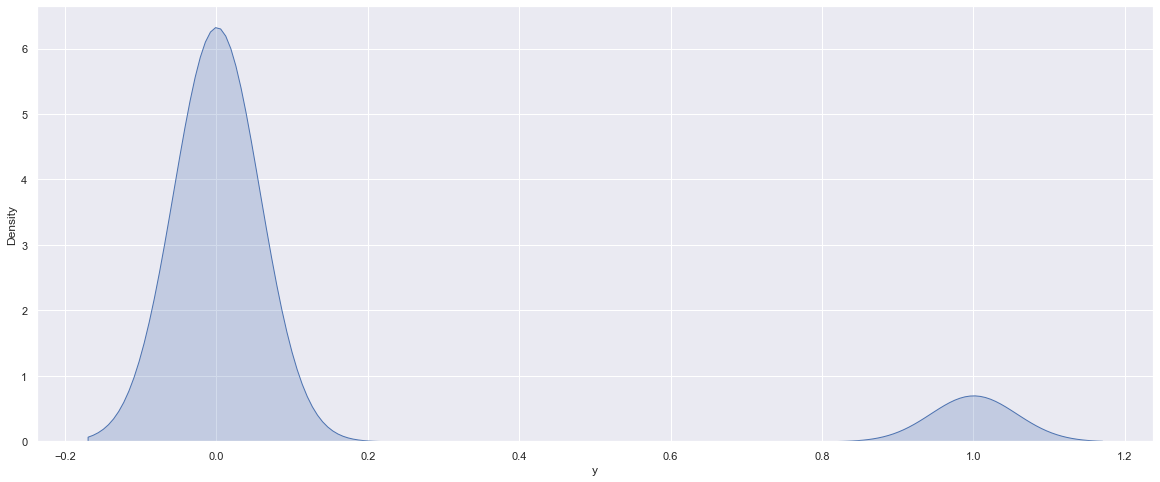

In [51]:
sns.kdeplot(y_pred_logica, shade=True) # Grafica para ver la densidad de distribución del resultado.

# Algoritmo KNN

Aplicamos este algoritmo ya que permite realizar una clasificación de datos nuevos, por lo tanto podremos clasificar los datos que tenemos en dos categorías, 'Si se suscriben' o 'No se suscriben'. Este algoritmo sirve para clasificar buscando los puntos de datos "más similares".

### 4. Creación del modelo y división del dataset

In [52]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

([<matplotlib.axis.XTick at 0x1b9c596eca0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

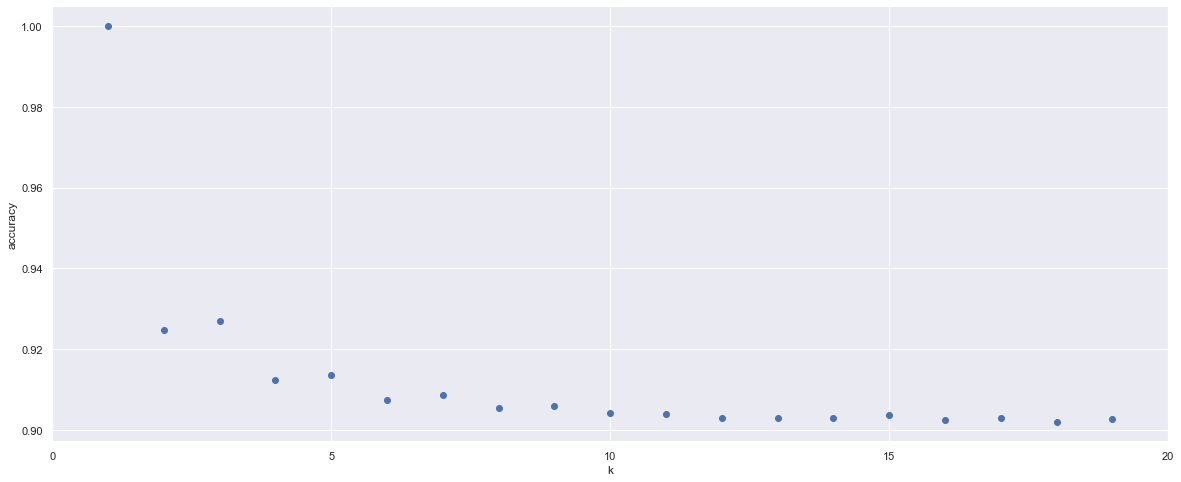

In [53]:
k_range = range(1, 20) # Obtenemos el mejor k
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_train, y_train))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [54]:
n_neighbors = k
knn = KNeighborsClassifier(n_neighbors) # Creamos el modelo

In [67]:
n_neighbors

19

### 5. Entrenamiento

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

### 6. Análisis de resultados

In [56]:
precision_algoritmo_knn = knn.score(X_test, y_test)
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set:     {:.2f}'
      .format(precision_algoritmo_knn))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set:     0.90


### 7. Realización de predicciones

In [57]:
# Obtenemos las predicciones empleando el dataset df_credit_test, que no contenía la variable 'y'

prob_threshold = 0.5
df_resultado_knn = pd.DataFrame(knn.predict_proba(df_credit_test_normal), columns=['Prob. No', 'Prob. Si']) #Obtenemos las probabilidades de la prediccion
df_resultado_knn['y'] = (df_resultado_knn['Prob. Si']>prob_threshold).apply(int) #Prediccion de la columna 'y' del test
df_resultado_knn

C:\Users\AdrianAlvarezCastro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,Prob. No,Prob. Si,y
0,0.947368,0.052632,0
1,1.000000,0.000000,0
2,0.947368,0.052632,0
3,1.000000,0.000000,0
4,0.894737,0.105263,0
...,...,...,...
4114,1.000000,0.000000,0
4115,1.000000,0.000000,0
4116,0.842105,0.157895,0
4117,1.000000,0.000000,0


In [58]:
y_pred_knn = df_resultado_knn["y"]

### 8. Visualización

In [59]:
# Visualizamos el informe de clasificación, así como la matriz de confusión
print(classification_report(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, knn.predict(X_test)))

# precision: Porcentaje de acierto de las columnas. Si salio un 0 que entrara un 0.
# recall: Porcentaje de acierto de las filas. Si entro un 0 que salga un 0.
# f1-score: media armónica entre percision y recall.

# accuracy: porcentaje de acierto.
# macro avg: media de los valores.

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.94      9141
         1.0       0.61      0.19      0.28      1153

    accuracy                           0.90     10294
   macro avg       0.76      0.59      0.61     10294
weighted avg       0.87      0.90      0.87     10294

[[9004  137]
 [ 939  214]]


<AxesSubplot:xlabel='y', ylabel='Density'>

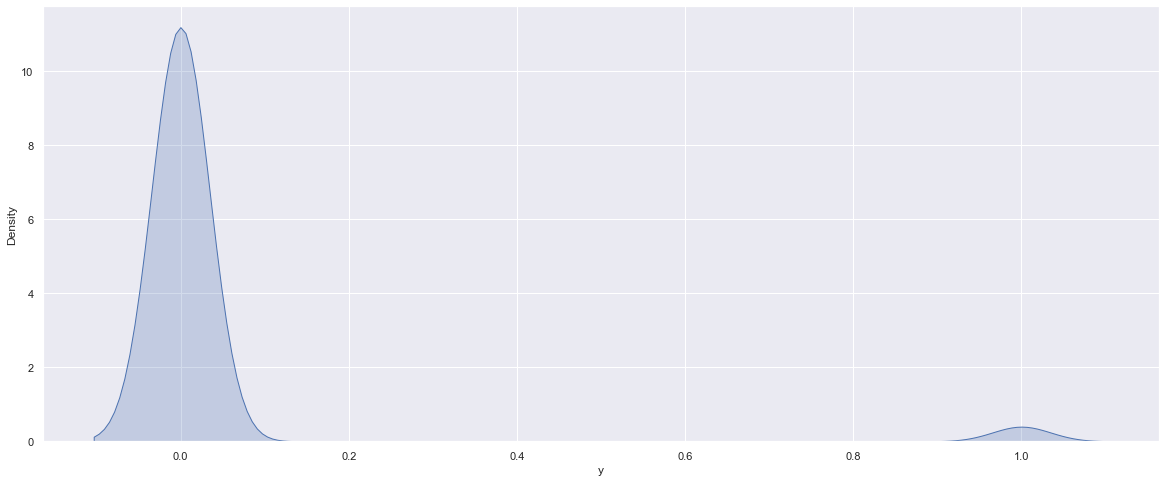

In [60]:
sns.kdeplot(y_pred_knn, shade=True) # Grafica para ver la densidad de distribución del resultado.

# SVM

Este algoritmo tambien es de clasificación.

### 4. Creación del modelo y división del dataset

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC  #Limear Support Vector Classification

svm_clf = Pipeline([   # Creamos el modelo
    ('Scaler', StandardScaler()),
    ('Linear_svc', LinearSVC(C=1, loss='hinge'))
])

### 5. Entrenamiento

In [62]:
svm_clf.fit(X_train, y_train)  # Entrenamos el modelo

C:\Users\AdrianAlvarezCastro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('Scaler', StandardScaler()),
                ('Linear_svc', LinearSVC(C=1, loss='hinge'))])

### 7. Realización de predicciones

In [63]:
y_pred_svm = svm_clf.predict(df_credit_test_normal)
y_pred_svm

C:\Users\AdrianAlvarezCastro\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([0., 0., 0., ..., 0., 0., 0.])

In [64]:
precision_algoritmo_svm = svm_clf.score(X_test, y_test)
print(precision_algoritmo_svm)

0.9034388964445308


### 8. Visualización

In [65]:
#sns.kdeplot(y_pred_svm, shade=True)

## Mejor modelo

In [66]:
print("Modelo con mejor precision")
print(f"Precision modelo regresión logica:  {round(precision_regresion_logica*100,2)}%")
print(f"Precision modelo algoritmo KNN:     {round(precision_algoritmo_knn*100,2)}%")
print(f"Precision modelo algoritmo SVM:     {round(precision_algoritmo_svm*100,2)}%")
print()
comparacion = pd.DataFrame()
comparacion["y_pred_logica"] = y_pred_logica
comparacion["y_pred_knn"] = y_pred_knn
comparacion["y_pred_svm"] = y_pred_svm
for y in comparacion:
    contador_cero = 0
    contador_uno = 0
    for i in comparacion[y]:
        if i == 0:
            contador_cero += 1
        else:
            contador_uno += 1
    print(f"Total 0 en {y}: {contador_cero}")
    print(f"Total 1 en {y}: {contador_uno}")

Modelo con mejor precision
Precision modelo regresión logica:  90.92%
Precision modelo algoritmo KNN:     89.55%
Precision modelo algoritmo SVM:     90.34%

Total 0 en y_pred_logica: 3708
Total 1 en y_pred_logica: 411
Total 0 en y_pred_knn: 3978
Total 1 en y_pred_knn: 141
Total 0 en y_pred_svm: 3789
Total 1 en y_pred_svm: 330


Como podemos observar la regresión logística tiene una mejor precisión a la hora de clasificar los datos, pero esta seguida muy de cerca por el algoritmo SVM. Esto se puede deber a que a la hora de clasificar solo tenemos dos opciones '0' o '1' y en casos como este la regresión logística tiene una precisión mayor. Si tuviéramos mas opciones a la hora de clasificar, tendríamos que tener en cuenta otro algoritmo, como puede ser el SVM.